In [2]:
import numpy as np
import matplotlib.pyplot as plt
from zadania_eigen import vectors_uniform, show_eigen_info

A: 
 [[3 1]
 [0 2]]
K: 
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]
L: 
 [[3. 0.]
 [0. 2.]]
K^-1: 
 [[ 1.          0.        ]
 [-0.70710678  0.70710678]]
A2: 
 [[3. 1.]
 [0. 2.]]


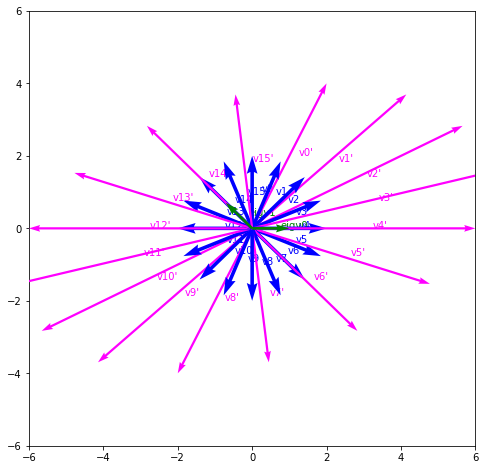

In [139]:
vectors = vectors_uniform(k=16)
# print(vectors)
A = np.array([[3, 1],
              [0, 2]])
plt.figure(figsize=(8,8))
show_eigen_info(A, vectors)

In [310]:
import random 

import matplotlib.colors as mcolors

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm
   
def plot_attractors(A, vectors):
    # TODO: Zad. 4.3. Uzupełnij funkcję tak by generowała wykres z atraktorami.
    values, eigvecs = np.linalg.eig(A)
    eigvecs = np.transpose(eigvecs)
    
    print("eigenvalues: \n", values)
    print("eigvecs: \n", eigvecs)
    eigvecs = [np.array(el) for el in eigvecs]
    # Dodajemy wektory przeciwne do wektorów własnych.
    temp_eigvecs = eigvecs.copy()
    for el in temp_eigvecs:
        eigvecs.append(el*-1)
        
    plt.figure(figsize=(8,8))
    
    # Tworzymy kolory.
    colors = list(mcolors.TABLEAU_COLORS.values())
    if len(eigvecs) > len(colors):    
        colors = []
        for el in eigvecs:
            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
            colors.append(color)
    
    # Rysujemy wektory własne + wektory do nich przeciwne - krótsze wektory z ostrymi strzałkami.
    for i, el in enumerate(eigvecs):
        plt.quiver(0.0, 0.0, el[0], el[1], width=0.006, color=colors[i], scale_units='xy', angles='xy', scale=1, zorder=4,
           headwidth=10, headlength=10)
        if i < len(values):
            plt.text(el[0], el[1], values[i], color="black", zorder=5)
            
   # Rysujemy podane w argumencie funkcji wektory w kolorze wektora własnego (lub przeciwnego), jeśli jest to ich atraktor.
    for v in vectors:
        temp = v
#         print("VEC===============: ", v)
        for i, eigvec in enumerate(eigvecs):
            for j in range(100):
                temp = normalize(A.dot(temp))
                if len(set(values)) == 1:
                    plt.quiver(0.0, 0.0, v[0], v[1], width=0.006, color='black', scale_units='xy', angles='xy', scale=1, zorder=4)
                    break
                if (np.allclose(temp, eigvec, atol=0.01)):
                    plt.quiver(0.0, 0.0, v[0], v[1], width=0.006, color=colors[i], scale_units='xy', angles='xy', scale=1, zorder=4)
                    break

    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.margins(0.05)
    plt.grid()

eigenvalues: 
 [2. 2.]
eigvecs: 
 [[1. 0.]
 [0. 1.]]


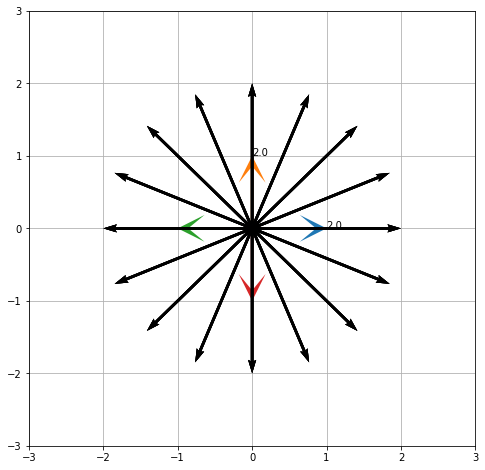

In [311]:
vectors = vectors_uniform(k=16)
A = np.array([[2, 0],
              [0, 2]])
plot_attractors(A, vectors)